**1.IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2.IMPORTING THE DATA**

In [2]:
train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")

In [3]:
train.describe(include='all')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,...,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,...,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,...,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,...,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,...,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,...,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.0

In [4]:
train.shape

(1460, 81)

In [5]:
train.isnull().sum().sort_values(ascending= False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [6]:
#Dropping the column with plenty of missing data

In [7]:
train.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage'],axis=1)
test.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage'],axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
5,1466,60,RL,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,0,4,2010,WD,Normal
6,1467,20,RL,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,500,3,2010,WD,Normal
7,1468,60,RL,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,0,5,2010,WD,Normal
8,1469,20,RL,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,0,2,2010,WD,Normal
9,1470,20,RL,8400,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,804.0,Rec,78.0,0.0,882.0,GasA,TA,Y,SBrkr,882,0,0,882,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1970.0,Fin,2.0,525.0,TA,TA,Y,240,0,0,0,0,0,0,4,2010,WD,Normal


(1460, 81)


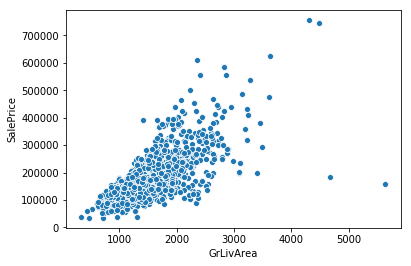

In [8]:
#Detecting outliers
print(train.shape)
sns.scatterplot(y="SalePrice", x="GrLivArea", data=train)

In [9]:
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index, inplace=True)
print('Rows and columns after dropping outliers :' , train.shape )

Rows and columns after dropping outliers : (1458, 81)


Now I'll check every features and will scale the data.

Text(0.5, 1.0, 'MSSubClass Count')

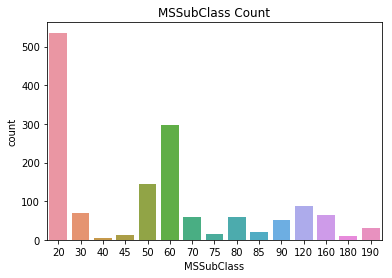

In [10]:
#MSSubClass : It identifies the type of dwelling involved in the sale.
sns.countplot(x="MSSubClass",data=train)
plt.title('MSSubClass Count')
# It contains pretty imbalanced data and I can't get any good insights from it ,so neglecting its effect.  

In [11]:
cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']
features=[]
obj_col=[]
for col in cols:
    if (train[col].dtype) == object :
        obj_col.append(col)
obj_col        

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
#Plotting
def plotting(col):
    sns.countplot(x=col,data=train)
    plt.title('CountPlot for '+ col)
    print('No. of missing values are : ')
    print(train[col].isnull().sum())
    
    

No. of missing values are : 
0


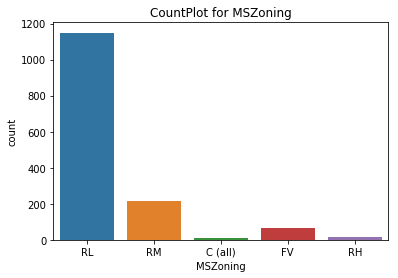

In [13]:
#Zoning Classification :  Identifies the general zoning classification of the sale.
plotting('MSZoning')
#It contains pretty imbalanced data and I can't get any good insights from it ,so neglecting its effect. 

No. of missing values are : 
0


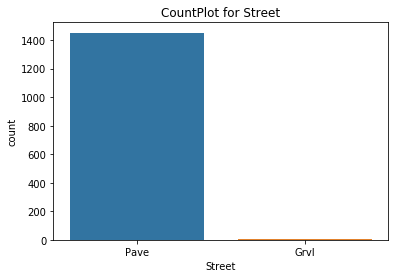

In [14]:
#Street : Type of road access to property
plotting('Street')
#It contains pretty imbalanced data and I can't get any good insights from it ,so neglecting its effect. 

No. of missing values are : 
0


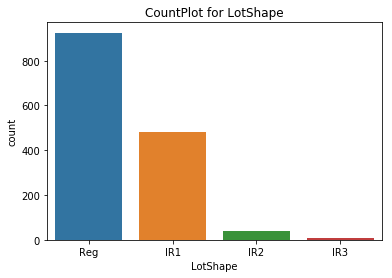

In [15]:
# Lot Shape : General shape of property
plotting('LotShape')
features.append('LotShape')
# It looks bit fine for considering this feature for final prediction.
# Mapping its values
train.LotShape=train.LotShape.replace({'Reg':1,'IR1':2,'IR2':3,'IR3':4})
test.LotShape=test.LotShape.replace({'Reg':1,'IR1':2,'IR2':3,'IR3':4})

No. of missing values are : 
0


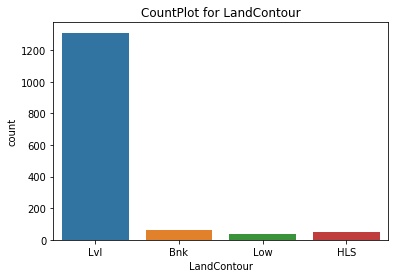

In [16]:
#LandContour: Flatness of the property
plotting('LandContour')
#It is biased towards only one category so it should be avoided


No. of missing values are : 
0


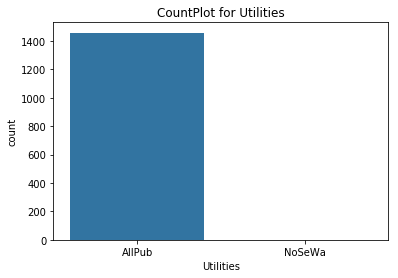

In [17]:
# Utilities: Type of utilities available
plotting('Utilities')
#Again a biased factor, so it should be avoided.


No. of missing values are : 
0


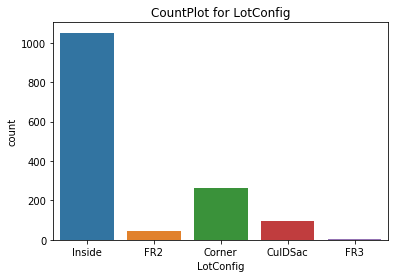

In [18]:
#LotConfig: Lot configuration
plotting('LotConfig')
# Well it looks okayish as CornerLotConfig will surely boost the price.
features.append('LotConfig')
#Mapping the values to make this column suitable for model.
train.LotConfig=train.LotConfig.replace({'Inside':1,'Corner':2,'CulDSac':3,'FR2':4,'FR3':5})
test.LotConfig=test.LotConfig.replace({'Inside':1,'Corner':2,'CulDSac':3,'FR2':4,'FR3':5})

No. of missing values are : 
0


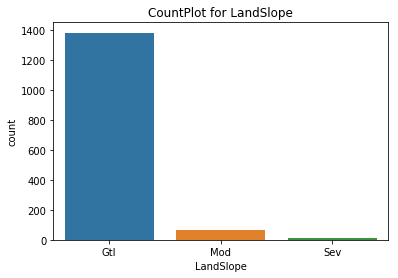

In [19]:
#LandSlope: Slope of property
plotting('LandSlope')
#This seems more biased towards Gentle Slope, so avoiding it.

                  SalePrice
Neighborhood               
Blmngtn       194870.882353
Blueste       137500.000000
BrDale        104493.750000
BrkSide       124834.051724
ClearCr       212565.428571
CollgCr       197965.773333
Crawfor       210624.725490
Edwards       127318.571429
Gilbert       192854.506329
IDOTRR        100123.783784
MeadowV        98576.470588
Mitchel       156270.122449
NAmes         145847.080000
NPkVill       142694.444444
NWAmes        189050.068493
NoRidge       335295.317073
NridgHt       316270.623377
OldTown       128225.300885
SWISU         142591.360000
Sawyer        136793.135135
SawyerW       186555.796610
Somerst       225379.837209
StoneBr       310499.000000
Timber        242247.447368
Veenker       238772.727273
No. of missing values are : 
0


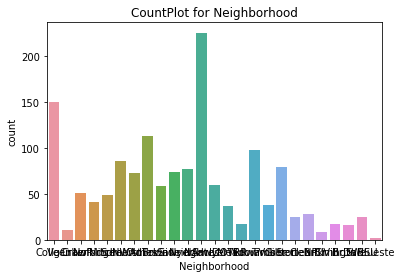

In [20]:
#Neighborhood: Physical locations within Ames city limits
train_neighbor=train.copy()
print(train_neighbor[['Neighborhood','SalePrice']].groupby(['Neighborhood'],as_index=True).mean())
plotting('Neighborhood')
#This looks promising as Price varies from area to area and it can be seen through the mean of the prices of selected Neighborhood.
features.append('Neighborhood')
train.Neighborhood=train.Neighborhood.replace({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
test.Neighborhood=test.Neighborhood.replace({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})

No. of missing values are : 
0


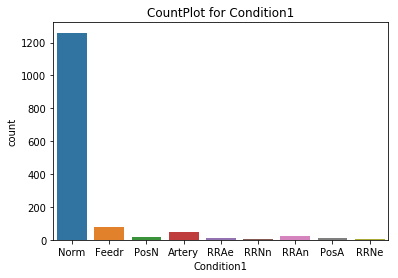

In [21]:
#Condition1: Proximity to various conditions
plotting('Condition1')
#Oops ,this looks totally biased.      
    

No. of missing values are : 
0


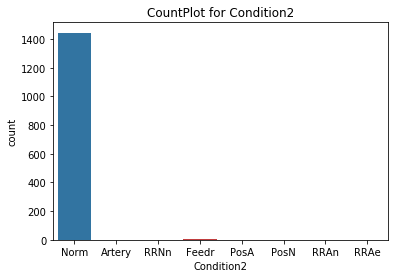

In [22]:
#Condition2: Proximity to various conditions (if more than one is present)
plotting('Condition2')
#JUst like, again biased data.

No. of missing values are : 
0


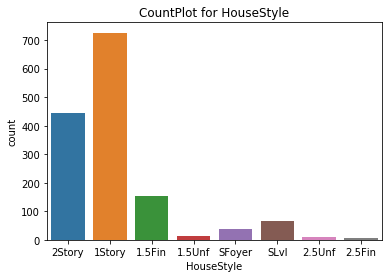

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


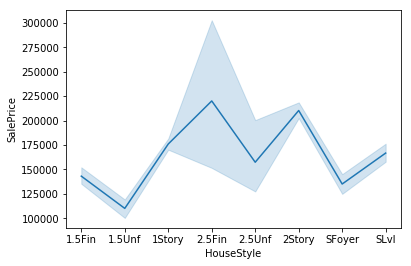

In [23]:
#HouseStyle: Style of dwelling
plotting('HouseStyle')
plt.show()
sns.lineplot(y='SalePrice',x='HouseStyle',data=train)
#Clearly it can be seen from the plots that HouseStyle has big effect on Saleprice.
features.append('HouseStyle')
#Mapping values 
train.HouseStyle=train.HouseStyle.replace({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
test.HouseStyle=test.HouseStyle.replace({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})


No. of missing values are : 
0


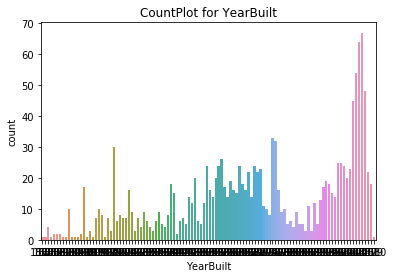

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


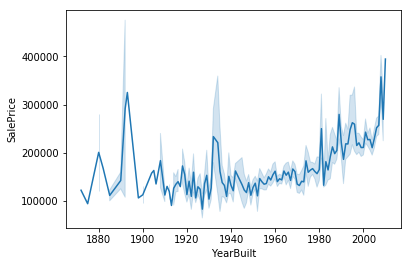

In [24]:
#YearBuilt: Original construction
plotting('YearBuilt')
plt.show()
sns.lineplot(y='SalePrice',x='YearBuilt',data=train)
# It is clearly visible. So it should be part of our features variable.
features.append('YearBuilt')

No. of missing values are : 
0


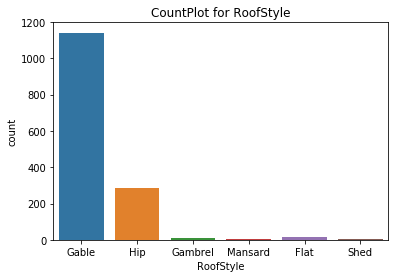

No. of missing values are : 
0


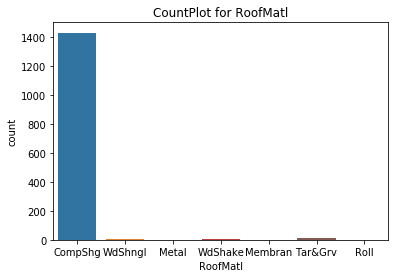

In [25]:
#Roof Style : Type of roof
plotting('RoofStyle')
plt.show()
#RoofMatl: Roof material
plotting('RoofMatl')
    
#Both are biased.    

No. of missing values are : 
0


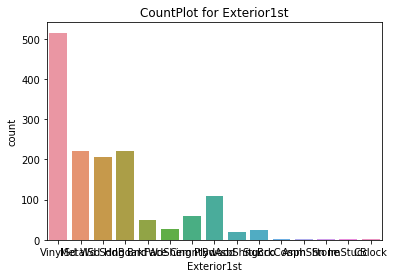

No. of missing values are : 
0


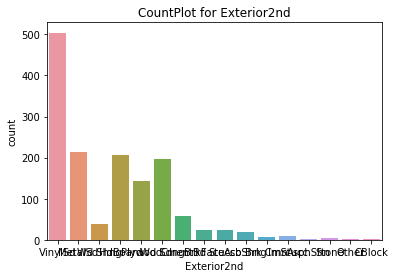

In [26]:
#Exteriors
#Exterior1st: Exterior covering on house
plotting('Exterior1st')
plt.show()
#Exterior2nd: Exterior covering on house (if more than one material)
plotting('Exterior2nd')
plt.show()

train.Exterior1st=train.Exterior1st.replace({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})

test.Exterior1st=test.Exterior1st.replace({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                            'Stone':7, 'ImStucc':7})

features.append('Exterior1st')


 

No. of missing values are : 
0


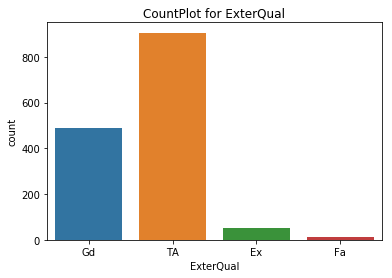

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


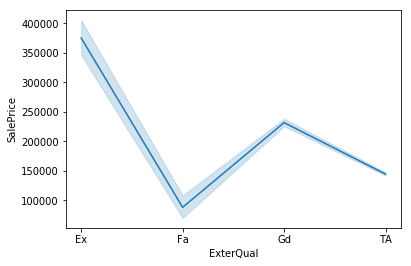

In [27]:
#feetExterQual: Evaluates the quality of the material on the exterior 

plotting('ExterQual')
plt.show()
sns.lineplot(y='SalePrice',x='ExterQual',data=train)
features.append('ExterQual')
train.ExterQual = train.ExterQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test.ExterQual = test.ExterQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

No. of missing values are : 
0


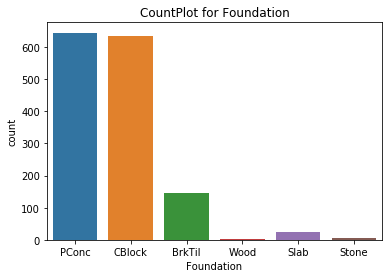

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


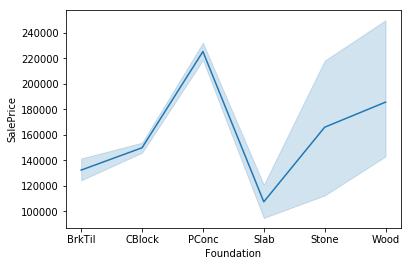

In [28]:
#Foundation: Type of foundation
plotting('Foundation')
plt.show()
sns.lineplot(y='SalePrice',x='Foundation',data=train)
train.Foundation=train.Foundation.replace({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
test.Foundation=test.Foundation.replace({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
features.append('Foundation')

No. of missing values are : 
37


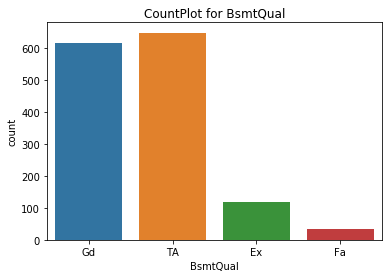

In [29]:
#BsmtQual: Evaluates the height of the basement
plotting('BsmtQual')
train.BsmtQual=train.BsmtQual.fillna('None').replace({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
test.BsmtQual=test.BsmtQual.fillna('None').replace({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
features.append('BsmtQual')

No. of missing values are : 
38


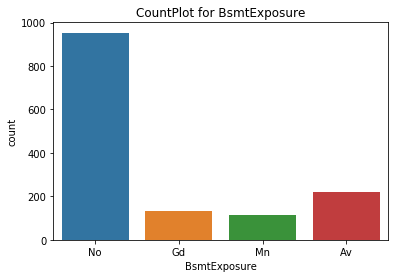

In [30]:
#BsmtExposure: Refers to walkout or garden level walls
plotting('BsmtExposure')
train.BsmtExposure=train.BsmtExposure.fillna('None').replace({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
test.BsmtExposure=test.BsmtExposure.fillna('None').replace({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4}) 
features.append('BsmtExposure')

No. of missing values are : 
0


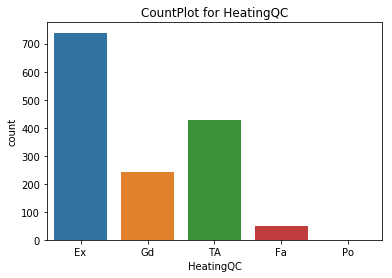

In [31]:
#HeatingQC :Heating quality and condition  
plotting('HeatingQC')
train.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
test.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
features.append('HeatingQC')

No. of missing values are : 
0


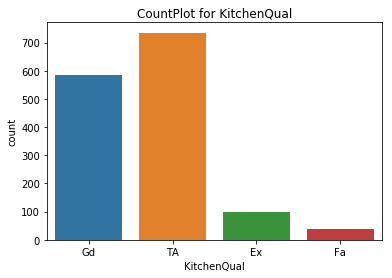

In [32]:
#KitchenQual: Kitchen quality
plotting('KitchenQual')
train.KitchenQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},inplace=True)
test.KitchenQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},inplace=True)
features.append('KitchenQual')
 

No. of missing values are : 
690


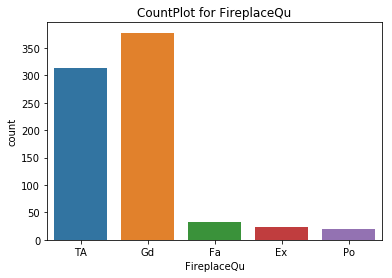

In [33]:
#FireplaceQu: Fireplace quality
plotting('FireplaceQu')
train.FireplaceQu.fillna('None',inplace=True)
train.FireplaceQu.replace({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
test.FireplaceQu.fillna('None',inplace=True)
test.FireplaceQu.replace({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
features.append('FireplaceQu')




No. of missing values are : 
81


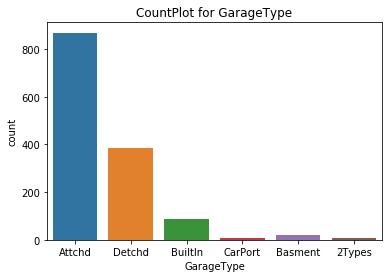

In [34]:
#GarageType: Garage location
plotting('GarageType')
train.GarageType.fillna('None',inplace=True)
test.GarageType.fillna('None',inplace=True)
train.GarageType.replace({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5},inplace=True)
test.GarageType.replace({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5},inplace=True)
features.append('GarageType')



No. of missing values are : 
81


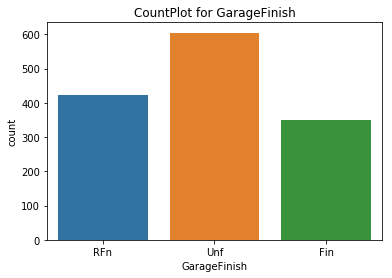

In [35]:
#GarageFinish: Interior finish of the garage
plotting('GarageFinish')
train.GarageFinish.fillna('None',inplace=True)
test.GarageFinish.fillna('None',inplace=True)
train.GarageFinish.replace({'None':1, 'Unf':2, 'RFn':3, 'Fin':4},inplace=True)
test.GarageFinish.replace({'None':1, 'Unf':2, 'RFn':3, 'Fin':4},inplace=True)
features.append('GarageFinish')
 

In [36]:
full=pd.concat([train,test],ignore_index=True)
full.drop('Id',axis=1,inplace=True)
full.shape

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2917, 80)

In [37]:
full.isnull().sum().sort_values(ascending=False)

PoolQC           2908
MiscFeature      2812
Alley            2719
Fence            2346
SalePrice        1459
LotFrontage       486
GarageQual        159
GarageYrBlt       159
GarageCond        159
BsmtCond           82
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Utilities           2
BsmtFullBath        2
BsmtHalfBath        2
Functional          2
SaleType            1
Exterior1st         1
TotalBsmtSF         1
Electrical          1
KitchenQual         1
GarageCars          1
Exterior2nd         1
BsmtUnfSF           1
BsmtFinSF2          1
BsmtFinSF1          1
GarageArea          1
                 ... 
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchSF         0
Neighborhood        0
MoSold    

In [38]:
train.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])



LotFrontage             
                    mean median count
Neighborhood                         
1              27.800000   21.0    15
2              49.400000   50.0    50
3              62.440000   60.0   250
4              74.123552   71.0   259
5              63.930233   69.0    43
6              77.409722   76.0   144
7              70.726804   70.0   194
8              68.400000   75.0   115
9              62.700000   61.5    20
10             84.908257   90.0   109

In [39]:
train['LotAreaCut'] = pd.qcut(train.LotArea,10)

train.groupby([train['LotAreaCut']])[['LotFrontage']].agg(['mean','median','count'])

test['LotAreaCut'] = pd.qcut(test.LotArea,10)

test.groupby([test['LotAreaCut']])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                          mean median count
LotAreaCut                                 
(1469.999, 4793.0]   34.259843   32.0   127
(4793.0, 6958.4]     55.398551   52.0   138
(6958.4, 7843.8]     61.534351   61.0   131
(7843.8, 8640.0]     67.368000   65.0   125
(8640.0, 9399.0]     69.694915   70.0   118
(9399.0, 10125.8]    73.289062   75.0   128
(10125.8, 10940.2]   73.395349   76.0   129
(10940.2, 12194.4]   81.508929   80.5   112
(12194.4, 14259.0]   85.067227   85.0   119
(14259.0, 56600.0]   92.266667   90.0   105

In [40]:
train['LotFrontage']= train.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))
test['LotFrontage']= test.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))

These columns are having plenty of missing values , so it is good idea  to fill them with 0.

In [41]:
columns = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in columns:
    train[col].fillna(0,inplace= True)
for col in columns:
    test[col].fillna(0,inplace=True)

In [42]:
columns1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish",
"GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col1 in columns1:
    train[col1].fillna('None',inplace = True)
    test[col1].fillna('None',inplace=True)

These columns are having very few missing values , so I'm filling them with their mode.

In [43]:
columns2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional",
            "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]

for col2 in columns2:
    train[col2].fillna(full[col2].mode()[0],inplace = True)
    test[col2].fillna(full[col2].mode()[0],inplace = True)

In [44]:
train.drop("LotAreaCut",axis=1,inplace=True)
test.drop("LotAreaCut",axis=1,inplace=True)

In [45]:
features

['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'YearBuilt',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [46]:
cols_num = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold",
          "YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]

for i in cols_num :
    train[i]=train[i].astype(str)
    test[i]=test[i].astype(str)

In [47]:
features

['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'YearBuilt',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [48]:
train.isnull().sum(0).sort_values(ascending=False)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
LandContour     0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
               ..
ScreenPorch     0
PoolArea        0
PoolQC          0
Fence           0
MiscFeature     0
MiscVal         0
MoSold          0
YrSold          0
SaleType        0
GarageCars      0
GarageFinish    0
GarageYrBlt     0
FullBath        0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
HalfBath        0
GarageType      0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQua

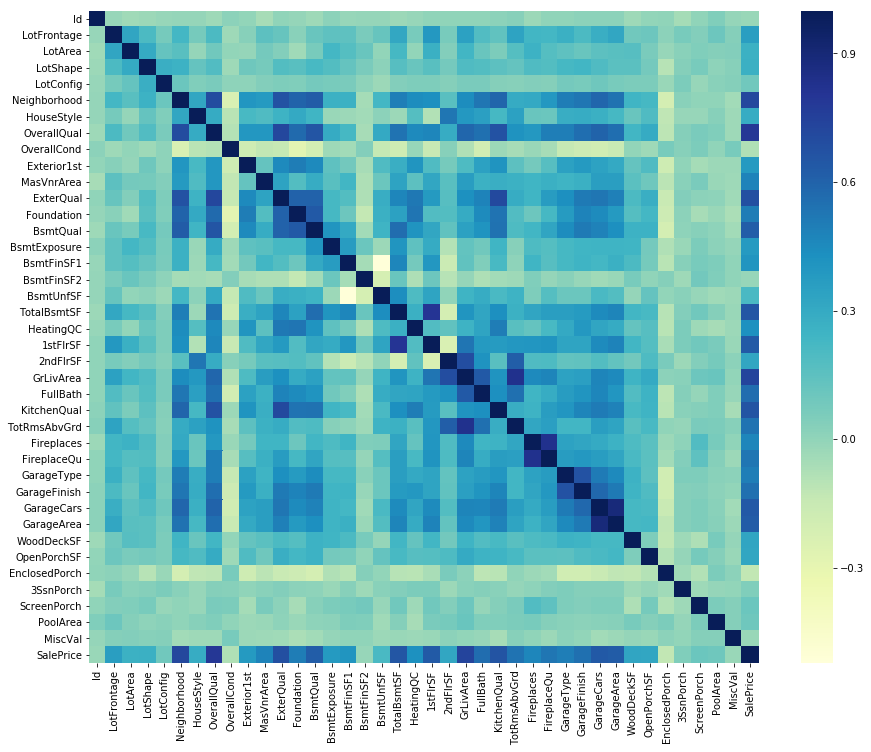

In [49]:
#Checking correlation via heatmap:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(),cmap="YlGnBu")
plt.show()

In [50]:
core=train.corr()
core_des=core.sort_values(by='SalePrice',ascending=False)
core_des

,Id,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
SalePrice,-0.021673,0.360375,0.268179,0.270477,0.092499,0.714816,0.292263,0.795774,-0.077948,0.383349,0.477810,0.686756,0.502768,0.624758,0.382907,0.409384,-0.011422,0.214460,0.651153,0.428024,0.631530,0.320532,0.734968,0.562165,0.662236,0.537769,0.469862,0.527256,0.496644,0.550255,0.641047,0.629217,0.324758,0.321142,-0.128646,0.044568,0.111415,0.099490,-0.021203,1.000000
OverallQual,-0.030213,0.203675,0.091392,0.190817,0.064424,0.698303,0.295311,1.000000,-0.090442,0.396564,0.398785,0.723286,0.577360,0.658657,0.295445,0.222467,-0.058324,0.308990,0.538595,0.456379,0.469092,0.290052,0.589414,0.548420,0.670627,0.420621,0.392472,0.497400,0.496929,0.555118,0.600741,0.557230,0.236753,0.297186,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.795774
GrLivArea,0.003138,0.351644,0.232927,0.192468,0.060986,0.445915,0.387912,0.589414,-0.077423,0.201821,0.368356,0.426168,0.292969,0.347007,0.132476,0.142196,-0.007138,0.247073,0.408793,0.255010,0.533697,0.694678,1.000000,0.638378,0.414774,0.829498,0.456993,0.472854,0.342475,0.351832,0.475442,0.456358,0.247120,0.302569,0.012976,0.022520,0.107768,0.115999,-0.001637,0.734968
Neighborhood,-0.005199,0.228306,0.163314,0.258677,0.110011,1.000000,0.319249,0.698303,-0.227835,0.402851,0.382144,0.672615,0.598926,0.630306,0.265671,0.263710,-0.049126,0.228325,0.499270,0.445665,0.430266,0.162218,0.445915,0.524316,0.594952,0.293291,0.308160,0.393404,0.506036,0.528658,0.589046,0.547840,0.241284,0.224299,-0.203173,0.020038,0.002484,0.001841,-0.045537,0.714816
ExterQual,0.003413,0.121906,0.040373,0.180443,0.051259,0.672615,0.252170,0.723286,-0.137724,0.453298,0.336020,1.000000,0.603526,0.605274,0.226129,0.184712,-0.075540,0.285381,0.467356,0.519683,0.387370,0.173135,0.426168,0.481244,0.713812,0.289587,0.243565,0.373428,0.431748,0.517046,0.525960,0.490152,0.205586,0.279707,-0.149025,0.037582,0.013799,0.012827,-0.039184,0.686756
KitchenQual,0.013709,0.139116,0.055988,0.151122,0.034402,0.594952,0.224432,0.670627,-0.025207,0.414404,0.274701,0.713812,0.538428,0.543074,0.240592,0.216572,-0.044358,0.210261,0.432699,0.503500,0.380968,0.163575,0.414774,0.432013,1.000000,0.280642,0.251871,0.366544,0.405240,0.472445,0.509042,0.485394,0.219112,0.249783,-0.105126,0.022769,0.031731,0.046646,-0.054012,0.662236
TotalBsmtSF,-0.025908,0.312767,0.223914,0.172605,0.042197,0.499270,-0.028472,0.538595,-0.174931,0.274877,0.339578,0.467356,0.346027,0.563320,0.406360,0.467624,0.114290,0.438979,1.000000,0.270692,0.803830,-0.206228,0.408793,0.327720,0.432699,0.266146,0.327741,0.359708,0.360737,0.376576,0.451890,0.475069,0.234476,0.215140,-0.096773,0.040921,0.092574,0.036089,-0.018514,0.651153
GarageCars,0.016863,0.279988,0.152484,0.194461,0.097318,0.589046,0.272117,0.600741,-0.185275,0.343039,0.360825,0.525960,0.449428,0.485119,0.245438,0.229077,-0.037914,0.213675,0.451890,0.324638,0.449195,0.181299,0.475442,0.468198,0.509042,0.361152,0.301062,0.368183,0.508194,0.579175,1.000000,0.887304,0.225462,0.209968,-0.151110,0.035957,0.050909,0.019446,-0.043004,0.641047
1stFlrSF,0.003921,0.393197,0.269234,0.165273,0.048999,0.430266,-0.086386,0.469092,-0.144717,0.194570,0.318180,0.387370,0.190869,0.317508,0.292807,0.395113,0.103923,0.329637,0.803830,0.188498,1.000000,-0.230408,0.533697,0.382120,0.380968,0.396381,0.402517,0.414817,0.331988,0.333299,0.449195,0.477299,0.235439,0.178859,-0.064247,0.059521,0.095042,0.062756,-0.021045,0.631530
GarageArea,0.014316,0.316804,0.163680,0.161068,0.068097,0.547840,0.221161,0.557230,-0.150503,0.308125,0.360786,0.490152,0.387310,0.432817,0.246885,0.273244,-0.017108,0.184580,0.475069,0.294097

In [51]:
core_des_top=core_des[(core_des['SalePrice']>0.5) & (core_des['SalePrice'] !=1)]
core_des_top.index

Index(['OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu',
       'Foundation'],
      dtype='object')

In [52]:
features.append(['OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu',
       'Foundation'])

In [53]:
core_des_low=core_des[(core_des['SalePrice']<0)]
core_des_low.index

Index(['BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch'], dtype='object')

In [54]:
features.append(['BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch'])


In [55]:
features=['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'OverallQual',
  'GrLivArea',
  'Neighborhood',
  'ExterQual',
  'KitchenQual',
  'TotalBsmtSF',
  'GarageCars',
  '1stFlrSF',
  'GarageArea',
  'BsmtQual',
  'FullBath',
  'GarageFinish',
  'TotRmsAbvGrd',
  'FireplaceQu',
  'Foundation',
 'BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch','SalePrice']

In [56]:
train_d=train.copy()

In [57]:
train_d=train_d[features]

In [58]:
train_d

,LotShape,LotConfig,Neighborhood,HouseStyle,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,OverallQual,GrLivArea,Neighborhood,ExterQual,KitchenQual,TotalBsmtSF,GarageCars,1stFlrSF,GarageArea,BsmtQual,FullBath,GarageFinish,TotRmsAbvGrd,FireplaceQu,Foundation,BsmtFinSF2,MiscVal,Id,OverallCond,EnclosedPorch,SalePrice
0,1,1,7,4,5,3,4,4,2,5,3,1,4,3,7,1710,7,3,3,856,2,856,548,4,2,3,8,1,4,0,0,1,5,0,208500
1,1,4,8,3,3,2,2,4,4,5,2,3,4,3,6,1262,8,2,2,1262,2,1262,460,4,2,3,6,3,2,0,0,2,8,0,181500
2,2,1,7,4,5,3,4,4,3,5,3,3,4,3,7,1786,7,3,3,920,2,920,608,4,2,3,6,3,4,0,0,3,5,0,223500
3,2,2,7,4,3,2,2,3,2,4,3,4,2,2,7,1717,7,2,3,756,3,961,642,3,1,2,7,4,2,0,0,4,5,272,140000
4,2,4,10,4,5,3,4,4,3,5,3,3,4,3,8,2198,10,3,3,1145,3,1145,836,4,2,3,9,3,4,0,0,5,5,0,250000
5,2,1,5,2,5,2,3,4,2,5,2,1,4,2,5,1362,5,2,2,796,2,796,480,4,1,2,5,1,3,0,700,6,5,0,143000
6,1,1,8,3,5,3,4,5,3,5,3,4,4,3,8,1694,8,3,3,1686,2,1694,636,5,2,3,7,4,4,0,0,7,5,0,307000
7,2,2,6,4,3,2,2,4,3,5,2,3,4,3,7,2090,6,2,2,1107,2,1107,484,4,2,3,7,3,2,32,350,8,6,228,200000
8,1,1,3,2,4,2,2,3,2,4,2,3,2,2,7,1774,3,2,2,952,2,1022,468,3,2,2,8,3,2,0,0,9,5,205,129900
9,1,2,3,1,3,2,2,3,2,5,2,3,4,3,5,1077,3,2,2,991,1,1077,205,3,1,3,5,3,2,0,0,10,6,0,118000


In [59]:
train_d=pd.get_dummies(train_d)


In [60]:
test_d=pd.get_dummies(test)

In [61]:
test_d.drop(['Id'],axis=1,inplace=True)

In [62]:
train_d.columns

Index(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu', 'Foundation',
       'BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch',
       'SalePrice'],
      dtype='object')

In [63]:
for col in train_d.columns:
    print(col,)

LotShape
LotConfig
Neighborhood
HouseStyle
Exterior1st
ExterQual
Foundation
BsmtQual
BsmtExposure
HeatingQC
KitchenQual
FireplaceQu
GarageType
GarageFinish
OverallQual
GrLivArea
Neighborhood
ExterQual
KitchenQual
TotalBsmtSF
GarageCars
1stFlrSF
GarageArea
BsmtQual
FullBath
GarageFinish
TotRmsAbvGrd
FireplaceQu
Foundation
BsmtFinSF2
MiscVal
Id
OverallCond
EnclosedPorch
SalePrice


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
predictors=train_d.drop(['Id','SalePrice'],axis=1)
target=train.SalePrice
x_train,x_cv,y_train,y_cv=train_test_split(predictors,target,test_size=0.35,random_state=0)


In [65]:
from sklearn.model_selection import KFold,cross_val_score
logreg = LinearRegression()
logreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
logreg.predict(x_cv)

array([142649.08349774, 152291.94805513,  36833.33014587, 125660.57342277,
       284009.50468679, 118176.35475852, 211406.37461049, 118865.41696579,
       143327.57584468, 139550.65735551, 194412.2503937 ,  98495.20316493,
       104145.432072  , 149292.13313296,  86740.47807506, 237468.94898336,
       218765.69026462,  80357.44368881, 163840.31108174, 378530.86997738,
       291984.32420909, 103351.08213895, 121178.05833915,  94216.47411736,
        99632.64908187, 227240.5029615 , 209910.33016851, 101014.45768293,
       132480.30272497, 377379.5427292 , 179134.85878981, 226567.94558407,
       151418.77940622, 234403.80566151,  78971.82711589, 109907.45687209,
       229078.86882511, 289214.82966141,  97737.84534331,  52620.70262745,
       126579.6104191 , 237779.48930344, 120237.06230934, 112318.36546768,
       189379.25202632, 168753.91409744, 315467.0694483 , 316931.95862268,
       405267.90703417, 255762.91774402, 255291.69166241,  94751.63114638,
       162695.51693197, 1

In [67]:
from sklearn.metrics import accuracy_score
y_pred=logreg.predict(x_cv)
logreg.score(x_cv,y_cv)

0.8508492595138913

In [68]:
features_train=['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu', 'Foundation',
       'BsmtFinSF2', 'MiscVal','OverallCond', 'EnclosedPorch']


In [69]:
test_p=test[features_train]
test_p=pd.get_dummies(test_p)

In [70]:
test_X = test_p
predicted_prices = logreg.predict(test_X)
predicted_prices

array([114111.25593272, 187494.25170509, 164735.38453939, ...,
       157160.44853547, 103006.04926298, 203045.70613963])

In [71]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)